In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

C:\Users\sidbh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\sidbh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


20.72307692307692


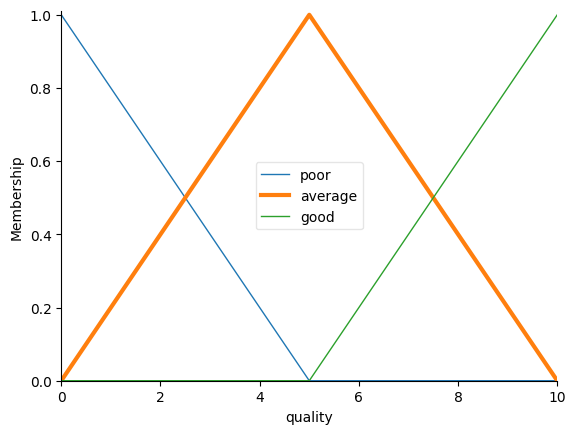

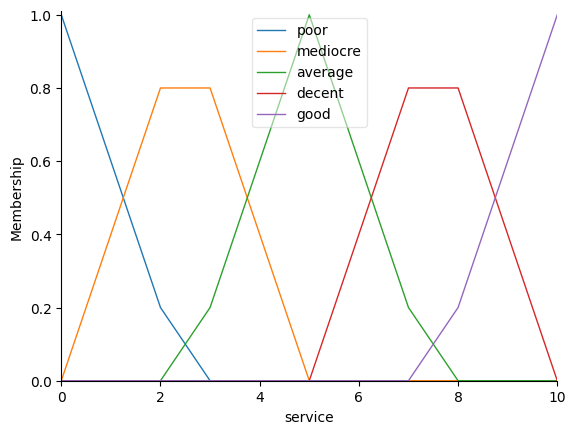

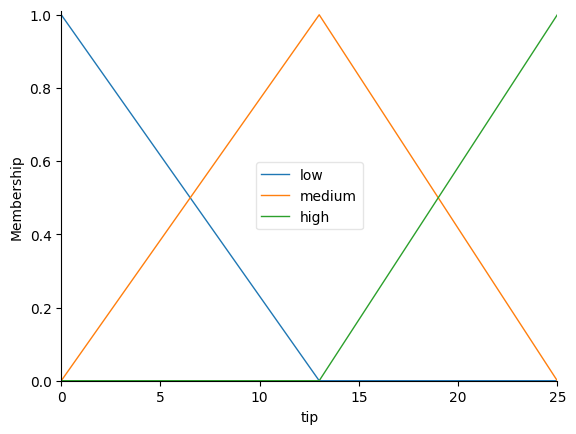

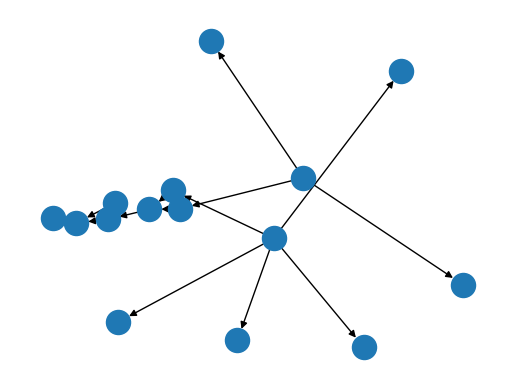

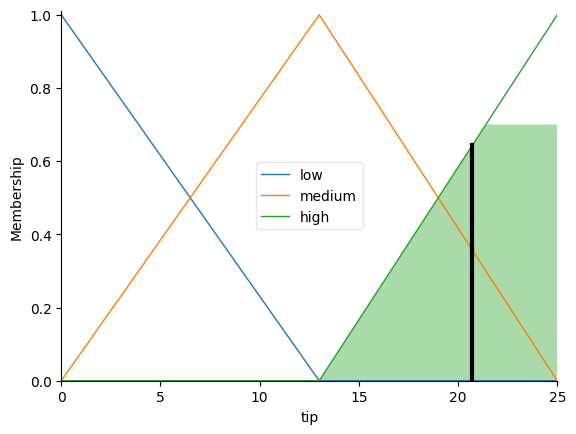

In [2]:
quality = ctrl.Antecedent (np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent (np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent (np.arange(0, 26, 1), 'tip')
service.automf()
quality.automf(3)
tip ['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip ['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip ['high'] = fuzz.trimf(tip.universe, [13, 25, 25])
quality['average'].view()
service.view()
tip.view()
rule1 = ctrl.Rule(quality['poor'] & service['poor'], tip['low'])
rule1.view()
rule2 = ctrl.Rule(quality['average'] & service['average'], tip['medium'])
rule3 = ctrl.Rule(quality['good'] & service['good'], tip['high'])
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['quality'] = 8.5
tipping.input['service'] = 9.5
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)